# Machine Learning 2023/2024

## Second Home Assignment

**Group Number:** 10

**Group Elements:**
- André Santos (fc53323)
- Filipe Santos (fc53304)
- João Martins (fc62532)
- Rúben Torres (fc62531)

**Hours Worked:**
- André Santos (10h)
- Filipe Santos (10h)
- João Martins (10h)
- Rúben Torres (10h)

### Imports

In [223]:
# General Purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Stats and Metrics
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    accuracy_score,
)

# Data Imputation and Preprocessing
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    PowerTransformer,
)

### Userful Functions

In [224]:
def printClassResults(model_name, truth, preds):
    print("The Model is: %s" % model_name)
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds, average="weighted"))
    print("The Recall is: %7.4f" % recall_score(truth, preds, average="weighted"))
    print("The F1 score is: %7.4f" % f1_score(truth, preds, average="weighted"))
    print(
        "The Matthews correlation coefficient is: %7.4f"
        % matthews_corrcoef(truth, preds)
    )
    print()
    print("The Confusion Matrix is:")
    print(pd.DataFrame(confusion_matrix(truth, preds)))
    print("\n")

### Loading the Dataset

In [225]:
df = pd.read_csv("Postures.csv", sep=",")
df.drop(0, axis=0, inplace=True)
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,?,?,?,?,?,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.54311453354464,87.7333643096221,61.2163626180662,-62.1262783028233,?,?,?,?,?,?
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.1305625712145,78.2298473919132,33.0784071753174,-45.2495433686171,?,?,?,?,?,?
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.83590370588782,78.591554010542,32.32773753847,-46.1665560916632,?,?,?,?,?,?
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.2216259324485,?,?,?,?,?,?,?,?,?


### Discard Columns

In [226]:
cols_to_discard = []
for col in df.columns:
    proportion = (df[col] == "?").mean() * 100
    if proportion > 0:
        print(
            f"Proportion of missing values in column { col }: { round(proportion, 2) }%"
        )
    if proportion > 65:
        cols_to_discard.append(col)

Proportion of missing values in column X3: 0.88%
Proportion of missing values in column Y3: 0.88%
Proportion of missing values in column Z3: 0.88%
Proportion of missing values in column X4: 4.0%
Proportion of missing values in column Y4: 4.0%
Proportion of missing values in column Z4: 4.0%
Proportion of missing values in column X5: 16.68%
Proportion of missing values in column Y5: 16.68%
Proportion of missing values in column Z5: 16.68%
Proportion of missing values in column X6: 33.1%
Proportion of missing values in column Y6: 33.1%
Proportion of missing values in column Z6: 33.1%
Proportion of missing values in column X7: 50.13%
Proportion of missing values in column Y7: 50.13%
Proportion of missing values in column Z7: 50.13%
Proportion of missing values in column X8: 60.86%
Proportion of missing values in column Y8: 60.86%
Proportion of missing values in column Z8: 60.86%
Proportion of missing values in column X9: 69.31%
Proportion of missing values in column Y9: 69.31%
Proportion o

In [227]:
label = "Class"
df_x = df.drop(label, axis=1)
df_y = df[label]

df_x.drop("User", axis=1, inplace=True)
for col in cols_to_discard:
    df_x.drop(col, axis=1, inplace=True)

df_x.replace("?", np.nan, inplace=True)
df_x

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8
1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,-46.460186,-1.9019397735909,...,-43.2637900001125,-30.2822013321426,77.6223061447627,-17.15029172919,-22.8338299139098,104.593912875762,-53.1261355228787,61.4949522101345,101.205748000188,-6.54311453354464
78092,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,-17.002723,-22.7439236254982,...,-46.5583729086904,-1.95850220442059,98.2889311555066,4.24833369793896,61.3900145605159,101.468284194012,-5.98537080649334,88.1772331562548,60.7806417592771,-62.1305625712145
78093,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,-53.939140,-30.2256749040353,...,-6.61698844268879,-1.12573832398984,122.6140268058,-46.7960541509443,88.2910287028482,60.3627679995225,-62.7187354592767,-1.77949490376791,98.0894592678955,3.83590370588782
78094,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,-17.460853,26.7159145624784,...,-6.8409418109905,54.0099616832869,129.477879104126,-43.9678201146984,-1.58141492943602,98.0174111620326,3.39429131311924,88.4657093720691,60.0507908377745,-63.2216259324485


In [228]:
df_y

1        1
2        1
3        1
4        1
5        1
        ..
78091    5
78092    5
78093    5
78094    5
78095    5
Name: Class, Length: 78095, dtype: int64

### Data Splitting

In [229]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x.values, df_y.values, random_state=0, test_size=0.25, shuffle=True
)

print(X_train.shape)
print(X_test.shape)

(58571, 27)
(19524, 27)


### Data Scaling

#### Data scaling analisys

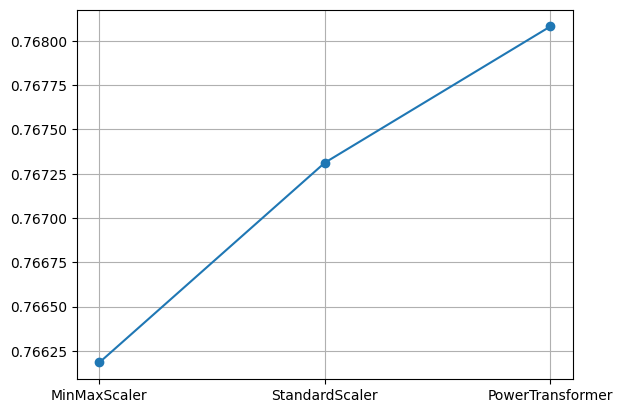

In [230]:
scaler1 = MinMaxScaler().fit(X_train)
Xt_train1 = scaler1.transform(X_train)
Xt_test1  = scaler1.transform(X_test)

scaler2 = StandardScaler().fit(X_train)
Xt_train2 = scaler2.transform(X_train)
Xt_test2  = scaler2.transform(X_test)

scaler3 = PowerTransformer().fit(X_train)
Xt_train3 = scaler3.transform(X_train)
Xt_test3 = scaler3.transform(X_test)


imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp1.fit(Xt_train1)
Xt_train1 = imp1.transform(Xt_train1)
Xt_test1 = imp1.transform(Xt_test1)

imp2 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp2.fit(Xt_train2)
Xt_train2 = imp2.transform(Xt_train2)
Xt_test2 = imp2.transform(Xt_test2)

imp3 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp3.fit(Xt_train3)
Xt_train3 = imp3.transform(Xt_train3)
Xt_test3 = imp3.transform(Xt_test3)

lrmdl1 = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train1, y_train)
lrmdl2 = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train2, y_train)
lrmdl3 = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train3, y_train)

sk_preds1=lrmdl1.predict(Xt_test1)
sk_preds2=lrmdl2.predict(Xt_test2)
sk_preds3=lrmdl3.predict(Xt_test3)

scalers = ["MinMaxScaler", "StandardScaler", "PowerTransformer"]
accuracies = [accuracy_score(y_test, sk_preds1), accuracy_score(y_test, sk_preds2), accuracy_score(y_test, sk_preds3)]

plt.plot(scalers, accuracies, marker = "o")
plt.grid()
plt.show()

In [231]:
scaler = PowerTransformer()
scaler.fit(X_train)
Xt_train = scaler.transform(X_train)
Xt_test  = scaler.transform(X_test)

### Data imputation

#### Data imputation analisys

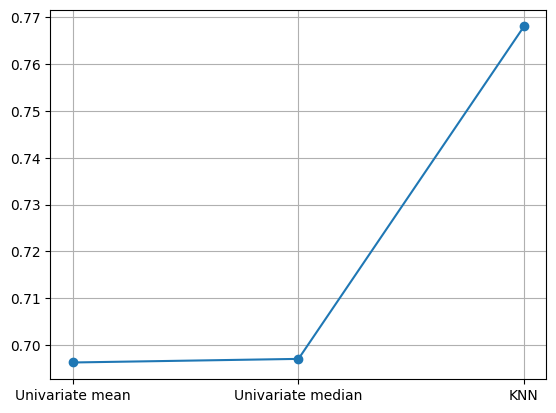

In [232]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp1.fit(Xt_train)
Xt_train1 = imp1.transform(Xt_train)
Xt_test1  = imp1.transform(Xt_test)

imp2 = SimpleImputer(missing_values=np.nan, strategy='median')
imp2.fit(Xt_train)
Xt_train2 = imp2.transform(Xt_train)
Xt_test2  = imp2.transform(Xt_test)
"""
imp3 = KNNImputer(n_neighbors=5, weights="uniform")
imp3.fit(Xt_train)
Xt_train3 = imp3.transform(Xt_train)
Xt_test3 = imp3.transform(Xt_test)
"""
lrmdl1 = DecisionTreeClassifier(max_depth=5).fit(Xt_train1, y_train)
lrmdl2 = DecisionTreeClassifier(max_depth=5).fit(Xt_train2, y_train)
#lrmdl3 = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train3, y_train)

sk_preds1=lrmdl1.predict(Xt_test1)
sk_preds2=lrmdl2.predict(Xt_test2)
#sk_preds3=lrmdl3.predict(Xt_test3)

imputers = ["Univariate mean", "Univariate median", "KNN"]
accuracies = [accuracy_score(y_test, sk_preds1), accuracy_score(y_test, sk_preds2), accuracy_score(y_test, sk_preds3)]

plt.plot(imputers, accuracies, marker = "o")
plt.grid()
plt.show()

#### Data imputation

In [233]:
#Univariate imputation
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(Xt_train)
Xt_train = imp.transform(Xt_train)
Xt_test  = imp.transform(Xt_test)

In [234]:
#knn imputer
#n_neighbors = [2, 5, 200]
#for i in n_neighbors:
#    print("\n", i, " neighbors: ")
#    imputer = KNNImputer(n_neighbors=i, weights="uniform")
#    Xt_train = imputer.fit_transform(Xt_train)
#    print(pd.DataFrame(Xt_train))
    
#imputer = KNNImputer(n_neighbors=5, weights="uniform")
#Xt_train = imputer.fit_transform(Xt_train)
#Xt_test = imputer.transform(Xt_test)

Logistic regression classification model

In [235]:
#lrmdl = LogisticRegression(random_state=0)
#lrmdl.fit(X_crit_train_s, y_crit_train)

lrmdl = LogisticRegression(random_state=0, max_iter=999999).fit(Xt_train, y_train)

sk_preds=lrmdl.predict(Xt_test)


#b0=mdl.intercept_[0]
#b1=mdl.coef_[0][0]
#print("Intercept (b0): %7.4f"% b0) 
#print("Slope     (b1): %7.4f"% b1) 

Decision tree classifier

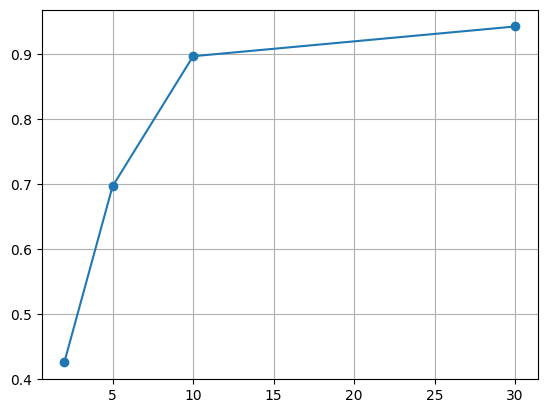

In [236]:
max_depths = [2, 5, 10, 30]
accs = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth) #parametros no construtor
    dt = dt.fit(Xt_train , y_train)
    dt_preds= dt.predict(Xt_test)
    accs.append(accuracy_score(y_test, dt_preds))

plt.plot(max_depths, accs, marker = "o")
plt.grid()
plt.show()

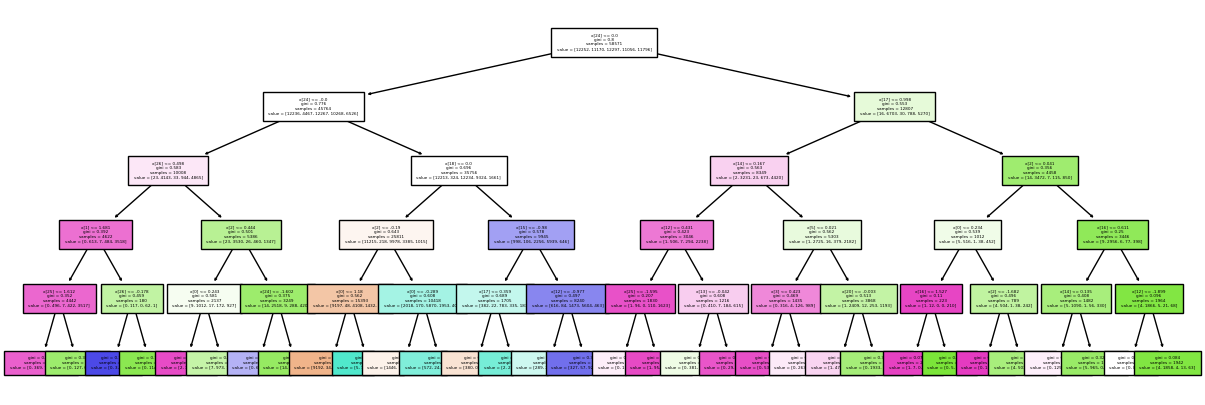

In [237]:
dt = DecisionTreeClassifier(max_depth=5) #parametros no construtor
dt = dt.fit(Xt_train , y_train)

plt.figure(figsize=(15, 5))
r=plot_tree(dt, filled=True, fontsize=3)#, feature_names= df.columns)
plt.show()

In [238]:
dt_preds= dt.predict(Xt_test)

Naive Bayes classifier

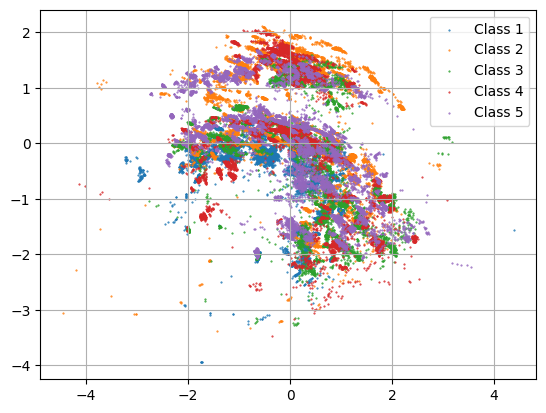

In [239]:
plt.scatter(Xt_train[y_train==1,0], Xt_train[y_train==1,1], label="Class 1", marker=".", s=1)
plt.scatter(Xt_train[y_train==2,0], Xt_train[y_train==2,1], label="Class 2", marker=".", s=1)
plt.scatter(Xt_train[y_train==3,0], Xt_train[y_train==3,1], label="Class 3", marker=".", s=1)
plt.scatter(Xt_train[y_train==4,0], Xt_train[y_train==4,1], label="Class 4", marker=".", s=1)
plt.scatter(Xt_train[y_train==5,0], Xt_train[y_train==5,1], label="Class 5", marker=".", s=1)
plt.legend()
plt.grid()
plt.show()

In [272]:
cA=Xt_test[y_test==1, 0]
cB=Xt_test[y_test==2, 0]
cC=Xt_test[y_test==3, 0]
cD=Xt_test[y_test==4, 0]
cE=Xt_test[y_test==5, 0]

mA =np.mean(cA)
mB =np.mean(cB)
mC =np.mean(cC)
mD =np.mean(cD)
mE =np.mean(cE)
sA=np.sqrt(np.var(cA))
sB=np.sqrt(np.var(cB))
sC=np.sqrt(np.var(cC))
sD=np.sqrt(np.var(cD))
sE=np.sqrt(np.var(cE))
print( "For class A, the mean is %6.3f and the stdev is %6.3f" % (mA, sA))
print( "For class B, the mean is %6.3f and the stdev is %6.3f" % (mB, sB))
print( "For class C, the mean is %6.3f and the stdev is %6.3f" % (mC, sC))
print( "For class D, the mean is %6.3f and the stdev is %6.3f" % (mD, sD))
print( "For class E, the mean is %6.3f and the stdev is %6.3f" % (mE, sE))

For class A, the mean is -0.364 and the stdev is  0.896
For class B, the mean is  0.069 and the stdev is  0.962
For class C, the mean is  0.345 and the stdev is  0.975
For class D, the mean is  0.090 and the stdev is  0.917
For class E, the mean is -0.118 and the stdev is  1.106


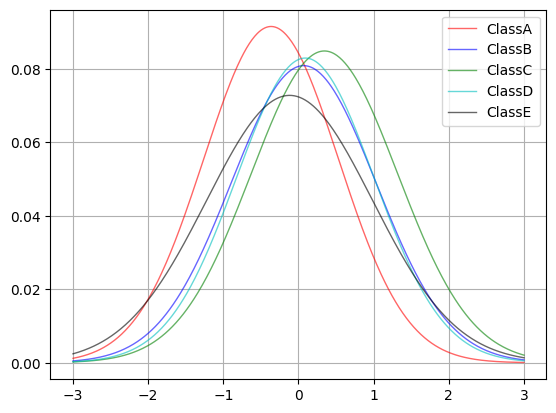

In [271]:
m1 = np.mean(Xt_train, axis=0)
v1 = np.var(Xt_train, axis=0)
s1 = np.sqrt(np.array([v1[0], v1[1]]))

x = np.linspace(m1[0]-3*s1[0], m1[1]+3*s1[1], 500)
normA=norm(loc=mA, scale=sA)
normB=norm(loc=mB, scale=sB)
normC=norm(loc=mC, scale=sC)
normD=norm(loc=mD, scale=sD)
normE=norm(loc=mE, scale=sE)

nA=np.sum(y_test==1)
nB=np.sum(y_test==2)
nC=np.sum(y_test==3)
nD=np.sum(y_test==4)
nE=np.sum(y_test==5)
priorA, priorB, priorC, priorD, priorE = nA/(nA+nB+nC+nD+nE), nB/(nA+nB+nC+nD+nE), nC/(nA+nB+nC+nD+nE), nD/(nA+nB+nC+nD+nE), nE/(nA+nB+nC+nD+nE) 

yA = normA.pdf(x)*priorA
yB = normB.pdf(x)*priorB
yC = normC.pdf(x)*priorC
yD = normD.pdf(x)*priorD
yE = normE.pdf(x)*priorE

plt.plot(x, yA,'r-', lw=1, alpha=0.6, label='ClassA')
plt.plot(x, yB,'b-', lw=1, alpha=0.6, label='ClassB')
plt.plot(x, yC,'g-', lw=1, alpha=0.6, label='ClassC')
plt.plot(x, yD,'c-', lw=1, alpha=0.6, label='ClassD')
plt.plot(x, yE,'k-', lw=1, alpha=0.6, label='ClassE')
plt.legend()
plt.grid()
plt.show()

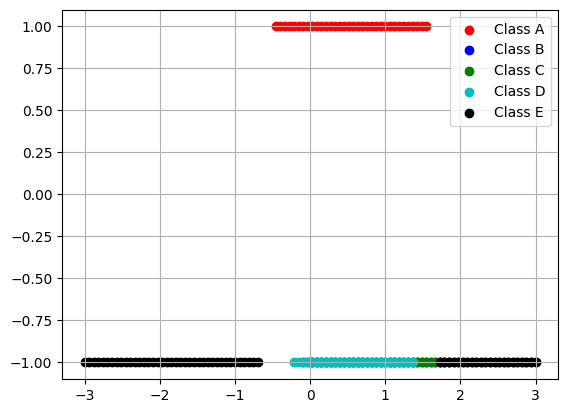

In [266]:

A_regions=x[yD>=yE]
B_regions=x[yB-((yA+yE+yC+yD)/4)>0]
C_regions=x[yC-((yA+yB+yE+yD)/4)>0]
D_regions=x[yD-((yA+yB+yC+yE)/4)>0]
E_regions=x[yE-((yA+yB+yC+yD)/4)>0]


plt.scatter(A_regions, np.ones(A_regions.size), c="r", label="Class A")
plt.scatter(B_regions, -np.ones(B_regions.size), c="b", label="Class B")
plt.scatter(C_regions, -np.ones(C_regions.size), c="g", label="Class C")
plt.scatter(D_regions, -np.ones(D_regions.size), c="c", label="Class D")
plt.scatter(E_regions, -np.ones(E_regions.size), c="k", label="Class E")
plt.legend()
plt.grid()
plt.show()

In [244]:
mdl=GaussianNB()
mdl = mdl.fit(Xt_train,y_train)
nb_preds=mdl.predict(Xt_test)

K-Nearest Neighbours Classifier

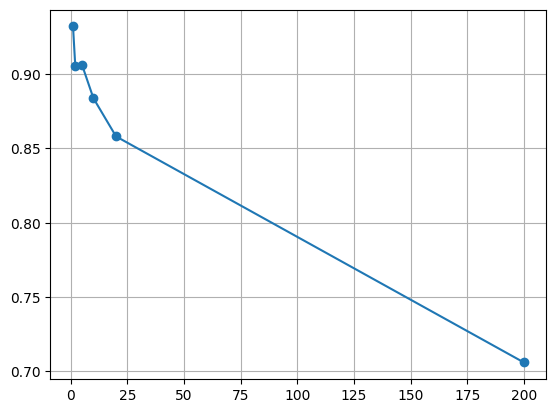

In [245]:
n_neighbors = [1, 2, 5, 10, 20, 200]
accs = []

for i in n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xt_train, y_train)
    preds=knn.predict(Xt_test)
    accs.append(accuracy_score(y_test, preds))

plt.plot(n_neighbors, accs, marker = "o")
plt.grid()
plt.show()

#escolhemos 5 neighbors pelo superior racio de accurary por nºneighbors porque nº muito baixo de vizinhos apresenta tipicamente uma elevada variação
#mostrando um bom equilibrio entre elevado accuracy e baixo nº de neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xt_train, y_train)
kn_preds=knn.predict(Xt_test)

In [246]:
printClassResults("DECISION TREE CLASSIFIER", y_test, dt_preds)

printClassResults("LOGISTIC CLASSIFIER", y_test, sk_preds)

printClassResults("NAIVE BAYES CLASSIFIER", y_test, nb_preds)

printClassResults("KNN CLASSIFIER",y_test, kn_preds)

The Model is: DECISION TREE CLASSIFIER
The Accuracy is:  0.6963
The Precision is:  0.7110
The Recall is:  0.6963
The F1 score is:  0.6900
The Matthews correlation coefficient is:  0.6268

The Confusion Matrix is:
      0     1     2     3     4
0  3601     7   306    97     2
1    62  3192    21    51   482
2  1329     8  2343   358     9
3   768   261   570  1822   298
4   295   750   161    95  2636


The Model is: LOGISTIC CLASSIFIER
The Accuracy is:  0.7681
The Precision is:  0.7657
The Recall is:  0.7681
The F1 score is:  0.7664
The Matthews correlation coefficient is:  0.7102

The Confusion Matrix is:
      0     1     2     3     4
0  3431     8   289   108   177
1    33  3262    95   137   281
2   333    15  3142   497    60
3   247   254   443  2339   436
4   185   465   105   360  2822


The Model is: NAIVE BAYES CLASSIFIER
The Accuracy is:  0.6205
The Precision is:  0.6306
The Recall is:  0.6205
The F1 score is:  0.5882
The Matthews correlation coefficient is:  0.5428

The C